<a href="https://colab.research.google.com/github/yandarick/mmseg_watermelon/blob/main/MMSeg_%E8%A5%BF%E7%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 作业要求

**作业：MMSeg 语义分割**
**背景：西瓜瓤、西瓜皮、西瓜籽像素级语义分割**
**TO DO LIST：**

1. Labelme 标注语义分割数据集（子豪兄已经帮你完成了）
2. 划分训练集和测试集（子豪兄已经帮你完成了）
3. Labelme 标注转 Mask 灰度图格式（子豪兄已经帮你完成了）
4. 使用 MMSegmentation 算法库，撰写 config 配置文件，训练 PSPNet 语义分割算法
5. 提交测试集评估指标
6. 自己拍摄西瓜图片和视频，将预测结果发到群里
7. （选做）训练 Segformer 语义分割算法，提交测试集评估指标

**西瓜瓤、西瓜籽数据集：**标注：同济子豪兄 image

image

类别名称 类别语义 标注类别 灰度图像素值
/ 背景 / 0
red 西瓜红瓤 多段线（polygon） 1
green 西瓜外壳 多段线（polygon） 2
white 西瓜白皮 多段线（polygon） 3
seed-black 西瓜黑籽 多段线（polygon） 4
seed-white 西瓜白籽 多段线（polygon） 5

数据集下载链接：
Labelme标注格式（没有划分训练集和测试集）：https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Labelme.zip
Mask标注格式（已划分训练集和测试集）：https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Mask.zip
需提交的测试集评估指标：（不能低于 baseline 指标的 50% ）
aAcc: 60.6200 mIoU: 21.1400 mAcc: 28.4600


https://github.com/open-mmlab/OpenMMLabCamp/issues/386


# 安装配置MMSegment



## Jupyter 显示代码块中每一行代码的输出

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## 加载Google云端硬盘

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 境检测是否包含pytorch环境和GPU

In [3]:
import torch
torch.__version__ # '2.0.1'
torch.cuda.is_available() # True

'2.0.1+cu118'

True

## 检测现有的文件信息

In [4]:
import os
os.getcwd()
%cd /content/drive/MyDrive/OpenMMlab
os.getcwd()
%pwd
%ls

'/content'

/content/drive/MyDrive/OpenMMlab


'/content/drive/MyDrive/OpenMMlab'

'/content/drive/MyDrive/OpenMMlab'

mmagic/  mmdetection/  MMPretrain/  mmsegmentation/  mmyolo/


## 安装Pytorch

In [5]:
# 安装Pytorch
!pip3 install install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio==0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.10.1+cu113 (from versions: 1.11.0, 1.11.0+cu113, 1.12.0, 1.12.0+cu113, 1.12.1, 1.12.1+cu113, 1.13.0, 1.13.1, 2.0.0, 2.0.1)
ERROR: No matching distribution found for torch==1.10.1+cu113


## 安装MMCV和MMEngine环境

In [6]:
!pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.3/374.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 25.5 MB/s eta 0:00:00
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 3.3.0
    Uninstalling platformdirs-3.3.0:
      Successfully uninstalled platformdirs-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 7.8 MB/s eta 0:00:00


## 安装其它工具包

In [7]:
!pip install opencv-python pillow matplotlib seaborn tqdm pytorch-lightning 'mmdet>=3.0.0rc1' -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.6/720.6 kB 818.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 8.2 MB/s eta 0:00:00


## 下载 MMSegmentation

In [8]:
%pwd

'/content/drive/MyDrive/OpenMMlab'

In [9]:
# 删掉原有的 mmsegmentation 文件夹（如有）
!rm -rf mmsegmentation

In [10]:
# 从 github 上下载最新的 mmsegmentation 源代码
!git clone https://github.com/open-mmlab/mmsegmentation.git -b dev-1.x

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 15132, done.
remote: Counting objects: 100% (698/698), done.
remote: Compressing objects: 100% (477/477), done.
remote: Total 15132 (delta 282), reused 426 (delta 189), pack-reused 14434
Receiving objects: 100% (15132/15132), 20.71 MiB | 17.27 MiB/s, done.
Resolving deltas: 100% (10587/10587), done.
Updating files: 100% (1461/1461), done.


In [11]:
# 进入主目录
import os
os.chdir('mmsegmentation')

## 安装 MMSegmentation

In [12]:
!pip install -v -e .

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/OpenMMlab/mmsegmentation
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-t159gh5v/mmsegmentation.egg-info
  writing /tmp/pip-pip-egg-info-t159gh5v/mmsegmentation.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-t159gh5v/mmsegmentation.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-t159gh5v/mmsegmentation.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-t159gh5v/mmsegmentation.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-t159gh5v/mmsegmentation.egg-info/SOURCES.txt'
  reading manifest file '/tmp/pip-pip-egg-info-t159gh5v/mmsegmentation.egg-info/SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'LICEN

# 准备数据集

## 下载预训练模型权重文件和视频素材

In [13]:
import os

# 创建 checkpoint 文件夹，用于存放预训练模型权重文件
os.mkdir('checkpoint')

# 创建 outputs 文件夹，用于存放预测结果
os.mkdir('outputs')

# 创建 data 文件夹，用于存放图片和视频素材
os.mkdir('data')

## 下载素材至`data`目录

In [14]:
# 西瓜图

!rm -rf Watermelon87_Semantic_Seg_Mask.zip Watermelon87_Semantic_Seg_Mask

!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Mask.zip

!unzip -d data Watermelon87_Semantic_Seg_Mask.zip  # 解压

!rm -rf Dubai-dataset.zip # 删除压缩包


--2023-06-18 14:32:01--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Mask.zip
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13230222 (13M) [application/zip]
Saving to: ‘Watermelon87_Semantic_Seg_Mask.zip’

Watermelon87_Semant 100%[===================>]  12.62M  5.29MB/s    in 2.4s    

2023-06-18 14:32:05 (5.29 MB/s) - ‘Watermelon87_Semantic_Seg_Mask.zip’ saved [13230222/13230222]

Archive:  Watermelon87_Semantic_Seg_Mask.zip
   creating: data/Watermelon87_Semantic_Seg_Mask/
   creating: data/Watermelon87_Semantic_Seg_Mask/img_dir/
   creating: data/Watermelon87_Semantic_Seg_Mask/img_dir/train/
  inflating: data/Watermelon87_Semantic_Seg_M

## 检查安装成功

In [15]:
# 检查 Pytorch
import torch, torchvision
print('Pytorch 版本', torch.__version__)
print('CUDA 是否可用',torch.cuda.is_available())

Pytorch 版本 2.0.1+cu118
CUDA 是否可用 True


In [16]:
# 检查 mmcv
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('MMCV版本', mmcv.__version__)
print('CUDA版本', get_compiling_cuda_version())
print('编译器版本', get_compiler_version())

MMCV版本 2.0.0
CUDA版本 11.8
编译器版本 GCC 9.3


In [17]:
# 检查 mmsegmentation
import mmseg
from mmseg.utils import register_all_modules
from mmseg.apis import inference_model, init_model
print('mmsegmentation版本', mmseg.__version__)

mmsegmentation版本 1.0.0


没有报错，即证明安装成功。

## 设置Matplotlib中文字体

In [18]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [19]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [20]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
# !rm -rf /home/featurize/.cache/matplotlib

# import matplotlib
# import matplotlib.pyplot as plt
# matplotlib.rc("font",family='SimHei') # 中文字体


In [21]:
# Colab 中文
# refer:https://sujingjhong.com/posts/how-to-show-matplotlib-visual-packages-in-chinese-on-colab/

# 從 Google API 上下載字體放到暫存資料夾底下
!wget 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip'
!mkdir /tmp/fonts
!unzip -o NotoSansCJKtc-hinted.zip -d /tmp/fonts/
!mv /tmp/fonts/NotoSansMonoCJKtc-Regular.otf /usr/share/fonts/truetype/NotoSansMonoCJKtc-Regular.otf -f
!rm -rf /tmp/fonts
!rm NotoSansCJKtc-hinted.zip


# 指定字體
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
font_dirs = ['/usr/share/fonts/truetype/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
  font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = "Noto Sans Mono CJK TC"

--2023-06-18 14:32:22--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 209.85.146.128, 2607:f8b0:4001:c1f::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|209.85.146.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip’

NotoSansCJKtc-hinte 100%[===================>] 115.63M  58.2MB/s    in 2.0s    

2023-06-18 14:32:25 (58.2 MB/s) - ‘NotoSansCJKtc-hinted.zip’ saved [121247366/121247366]

Archive:  NotoSansCJKtc-hinted.zip
  inflating: /tmp/fonts/LICENSE_OFL.txt  
  inflating: /tmp/fonts/NotoSansCJKtc-Black.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Bold.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-DemiLight.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Light.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Medium.otf  
  inflating:

Text(0.5, 1.0, 'matplotlib中文字体测试')

Text(0.5, 0, 'X轴')

Text(0, 0.5, 'Y轴')

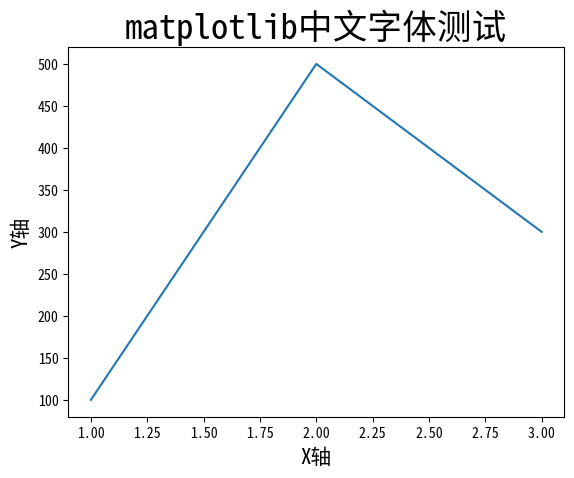

In [22]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

# 准备config配置文件

## 进入MMSegmentation主目录

In [23]:
%pwd

'/content/drive/MyDrive/OpenMMlab/mmsegmentation'

In [24]:
# import os
# os.chdir('../mmsegmentation')

In [25]:
os.getcwd()

'/content/drive/MyDrive/OpenMMlab/mmsegmentation'

## 导入工具包

In [26]:
import numpy as np
from PIL import Image

import os.path as osp
from tqdm import tqdm

import mmcv
import mmengine
import matplotlib.pyplot as plt
%matplotlib inline

## 定义数据集类（各类别名称及配色）

In [27]:
!rm -rf mmseg/datasets/DubaiDataset.py # 删除原有文件
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/DubaiDataset.py -P mmseg/datasets


--2023-06-18 14:32:48--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/DubaiDataset.py
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 867 [binary/octet-stream]
Saving to: ‘mmseg/datasets/DubaiDataset.py’

DubaiDataset.py     100%[===================>]     867  --.-KB/s    in 0s      

2023-06-18 14:32:51 (19.8 MB/s) - ‘mmseg/datasets/DubaiDataset.py’ saved [867/867]



需要修改:
class DubaiDataset(BaseSegDataset):
    # 类别和对应的可视化配色
    METAINFO = {
        'classes':['/', 'red', 'green', 'white', 'seed-black', 'seed-white'],
        'palette':[[132,41,246], [228,193,110], [152,16,60], [58,221,254], [41,169,226], [155,155,155]]
    }

## 注册数据集类

In [28]:
!rm -rf mmseg/datasets/__init__.py # 删除原有文件
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/__init__.py -P mmseg/datasets


--2023-06-18 14:33:48--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/__init__.py
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2620 (2.6K) [binary/octet-stream]
Saving to: ‘mmseg/datasets/__init__.py’

__init__.py         100%[===================>]   2.56K  --.-KB/s    in 0s      

2023-06-18 14:33:49 (45.1 MB/s) - ‘mmseg/datasets/__init__.py’ saved [2620/2620]



## 定义训练及测试pipeline

In [29]:
!rm -rf configs/_base_/datasets/DubaiDataset_pipeline.py
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/DubaiDataset_pipeline.py -P configs/_base_/datasets


--2023-06-18 14:33:54--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/DubaiDataset_pipeline.py
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2268 (2.2K) [binary/octet-stream]
Saving to: ‘configs/_base_/datasets/DubaiDataset_pipeline.py’

DubaiDataset_pipeli 100%[===================>]   2.21K  --.-KB/s    in 0s      

2023-06-18 14:33:55 (52.2 MB/s) - ‘configs/_base_/datasets/DubaiDataset_pipeline.py’ saved [2268/2268]



## 下载模型config配置文件

In [30]:
!rm -rf configs/pspnet/pspnet_r50-d8_4xb2-40k_DubaiDataset.py # 删除原有文件
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/pspnet_r50-d8_4xb2-40k_DubaiDataset.py -P configs/pspnet


--2023-06-18 14:33:57--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/pspnet_r50-d8_4xb2-40k_DubaiDataset.py
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344 [binary/octet-stream]
Saving to: ‘configs/pspnet/pspnet_r50-d8_4xb2-40k_DubaiDataset.py’

pspnet_r50-d8_4xb2- 100%[===================>]     344  --.-KB/s    in 0s      

2023-06-18 14:33:58 (5.76 MB/s) - ‘configs/pspnet/pspnet_r50-d8_4xb2-40k_DubaiDataset.py’ saved [344/344]



## 载入config配置文件

In [31]:
from mmengine import Config
cfg = Config.fromfile('./configs/pspnet/pspnet_r50-d8_4xb2-40k_DubaiDataset.py')

## 修改config配置文件

In [32]:
cfg.norm_cfg = dict(type='BN', requires_grad=True) # 只使用GPU时，BN取代SyncBN
cfg.crop_size = (256, 256)
cfg.model.data_preprocessor.size = cfg.crop_size
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head

# 模型 decode/auxiliary 输出头，指定为类别个数
cfg.model.decode_head.num_classes = 6
cfg.model.auxiliary_head.num_classes = 6

cfg.train_dataloader.batch_size = 8

cfg.test_dataloader = cfg.val_dataloader

# 结果保存目录
cfg.work_dir = './work_dirs/WatermelonDataset'

# 训练迭代次数
cfg.train_cfg.max_iters = 3000
# 评估模型间隔
cfg.train_cfg.val_interval = 400
# 日志记录间隔
cfg.default_hooks.logger.interval = 100
# 模型权重保存间隔
cfg.default_hooks.checkpoint.interval = 1500

# 随机数种子
cfg['randomness'] = dict(seed=0)

cfg.data_root = 'data/Watermelon87_Semantic_Seg_Mask/'
cfg.train_dataloader.dataset.data_root = 'data/Watermelon87_Semantic_Seg_Mask/'
cfg.val_dataloader.dataset.data_root = 'data/Watermelon87_Semantic_Seg_Mask/'
cfg.test_dataloader.dataset.data_root = 'data/Watermelon87_Semantic_Seg_Mask/'

## 查看完整config配置文件

In [33]:
print(cfg.pretty_text)

norm_cfg = dict(type='BN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(64, 64))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(256, 256)),
    pretrained='open-mmlab://resnet50_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='PSPHead',
        in_channels=2048,
        in_index=3,
        channels=51

## 保存config配置文件

In [34]:
cfg.dump('pspnet-DubaiDataset_20230612.py')

# MMSegmentation训练语义分割模型

## 进入MMSegmentation主目录

In [35]:
# import os
# os.chdir('../mmsegmentation')

In [36]:
os.getcwd()

'/content/drive/MyDrive/OpenMMlab/mmsegmentation'

## 导入工具包

In [37]:
import numpy as np

import os.path as osp
from tqdm import tqdm

import mmcv
import mmengine

## 载入config配置文件

In [38]:
from mmengine import Config
cfg = Config.fromfile('pspnet-DubaiDataset_20230612.py')

## 准备训练

In [40]:
from mmengine.runner import Runner
from mmseg.utils import register_all_modules

# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner
register_all_modules(init_default_scope=False)
runner = Runner.from_cfg(cfg)

06/18 14:34:59 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla V100-SXM2-16GB
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


06/18 14:35:01 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/18 14:35:01 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

## 开始训练

如果遇到报错`CUDA out of memeory`，可尝试以下步骤：

1. 调小 batch size

2. 左上角`内核-关闭所有内核`

3. 重启实例，或者使用显存更高的实例即可。

运行 Runner.train() 报错：
1. FileNotFoundError: [Errno 2] No such file or directory: 'data/Watermelon87_Semantic_Seg_Mask/ann_dir/train/21746.1.png'


2. FileNotFoundError: [Errno 2] No such file or directory: 'data/Watermelon87_Semantic_Seg_Mask/ann_dir/val/01bd15599c606aa801201794e1fa30.jpg@1280w_1l_2o_100sh.png'


修改命名：
1. 'data/Watermelon87_Semantic_Seg_Mask/ann_dir/train/21746.png' 改为： 'data/Watermelon87_Semantic_Seg_Mask/ann_dir/train/21746.1.png'

2. /content/drive/MyDrive/OpenMMlab/mmsegmentation/data/Watermelon87_Semantic_Seg_Mask/ann_dir/val/01bd15599c606aa801201794e1fa30.png
修改为/content/drive/MyDrive/OpenMMlab/mmsegmentation/data/Watermelon87_Semantic_Seg_Mask/ann_dir/val/01bd15599c606aa801201794e1fa30.jpg@1280w_1l_2o_100sh.png




In [43]:
runner.train()

06/18 14:37:54 - mmengine - INFO - Checkpoints will be saved to /content/drive/MyDrive/OpenMMlab/mmsegmentation/work_dirs/WatermelonDataset.
06/18 14:38:21 - mmengine - INFO - Iter(train) [ 100/3000]  lr: 9.9779e-03  eta: 0:22:17  time: 0.3546  data_time: 0.1404  memory: 3346  loss: 0.0712  decode.loss_ce: 0.0488  decode.acc_seg: 69.0552  aux.loss_ce: 0.0224  aux.acc_seg: 68.7622
06/18 14:38:49 - mmengine - INFO - Iter(train) [ 200/3000]  lr: 9.9557e-03  eta: 0:17:22  time: 0.2497  data_time: 0.0529  memory: 3346  loss: 0.0696  decode.loss_ce: 0.0474  decode.acc_seg: 77.9938  aux.loss_ce: 0.0222  aux.acc_seg: 79.2755
06/18 14:39:20 - mmengine - INFO - Iter(train) [ 300/3000]  lr: 9.9334e-03  eta: 0:15:48  time: 0.2383  data_time: 0.0382  memory: 3346  loss: 0.0555  decode.loss_ce: 0.0383  decode.acc_seg: 73.4070  aux.loss_ce: 0.0172  aux.acc_seg: 76.6174
06/18 14:39:51 - mmengine - INFO - Iter(train) [ 400/3000]  lr: 9.9111e-03  eta: 0:14:40  time: 0.2622  data_time: 0.0600  memory: 33

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


06/18 14:40:10 - mmengine - INFO - per class results:
06/18 14:40:10 - mmengine - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
|     /      | 60.95 | 99.96 |
|    red     | 11.42 | 11.44 |
|   green    |  0.0  |  0.0  |
|   white    |  2.23 |  2.23 |
| seed-black | 12.64 | 12.85 |
| seed-white |  0.0  |  0.0  |
+------------+-------+-------+
06/18 14:40:10 - mmengine - INFO - Iter(val) [11/11]    aAcc: 62.2100  mIoU: 14.5400  mAcc: 21.0800  data_time: 0.0542  time: 1.7849
06/18 14:40:40 - mmengine - INFO - Iter(train) [ 500/3000]  lr: 9.8888e-03  eta: 0:13:45  time: 0.2240  data_time: 0.0223  memory: 10063  loss: 0.0561  decode.loss_ce: 0.0395  decode.acc_seg: 77.6306  aux.loss_ce: 0.0166  aux.acc_seg: 71.1945
06/18 14:41:10 - mmengine - INFO - Iter(train) [ 600/3000]  lr: 9.8665e-03  eta: 0:13:01  time: 0.3578  data_time: 0.1365  memory: 3368  loss: 0.0545  decode.loss_ce: 0.0387  decode.acc_seg: 79.4434  aux.loss_ce: 0.0158  aux

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-0

# 用训练得到的模型预测

## 进入MMSegmentation主目录

In [44]:
# import os
# os.chdir('../mmsegmentation')

In [45]:
os.getcwd()

'/content/drive/MyDrive/OpenMMlab/mmsegmentation'

## 导入工具包

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mmseg.apis import init_model, inference_model, show_result_pyplot
import mmcv
import cv2

## 载入配置文件

In [47]:
# 载入 config 配置文件
from mmengine import Config
cfg = Config.fromfile('pspnet-DubaiDataset_20230612.py')

In [48]:
from mmengine.runner import Runner
from mmseg.utils import register_all_modules

# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner

register_all_modules(init_default_scope=False)
runner = Runner.from_cfg(cfg)

06/18 14:54:02 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla V100-SXM2-16GB
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/content/drive/MyDrive/OpenMMlab/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/content/drive/MyDrive/OpenMMlab/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/drive/MyDrive/OpenMMlab/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels,

06/18 14:54:04 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/18 14:54:04 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/drive/MyDrive/OpenMMlab/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


## 载入模型

In [49]:
checkpoint_path = './work_dirs/WatermelonDataset/iter_3000.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')

Loads checkpoint by local backend from path: ./work_dirs/WatermelonDataset/iter_3000.pth


## 载入测试集图像，或新图像

In [50]:
img = mmcv.imread('/content/drive/MyDrive/OpenMMlab/mmsegmentation/data/Watermelon87_Semantic_Seg_Mask/img_dir/val/R.jpeg')

## 语义分割预测

In [51]:
result = inference_model(model, img)

In [52]:
result.keys()

['pred_sem_seg', 'seg_logits']

In [53]:
pred_mask = result.pred_sem_seg.data[0].cpu().numpy()

In [54]:
pred_mask.shape

(1333, 2000)

In [55]:
np.unique(pred_mask)

array([0, 1, 2, 3, 4])

## 可视化语义分割预测结果

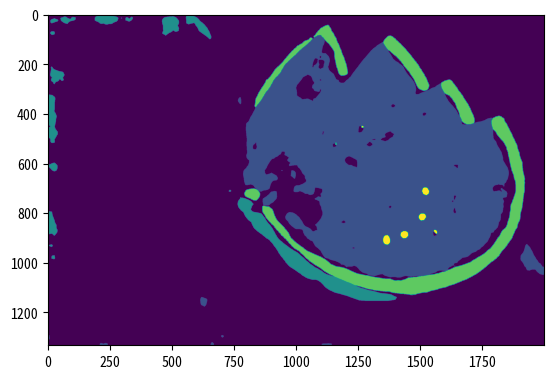

In [56]:
plt.imshow(pred_mask)
plt.show()

06/18 14:54:28 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


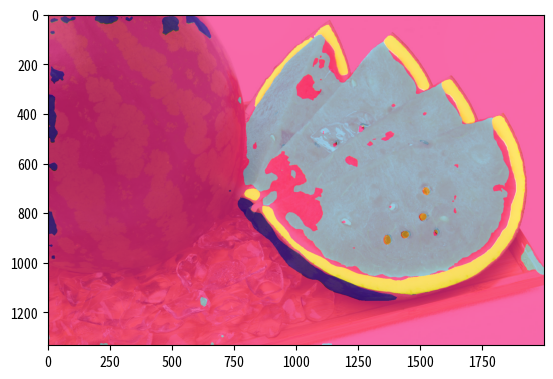

In [57]:
# 可视化预测结果
visualization = show_result_pyplot(model, img, result, opacity=0.7, out_file='pred.jpg')
plt.imshow(mmcv.bgr2rgb(visualization))
plt.show()

## 获取测试集标注

In [58]:
label = mmcv.imread('/content/drive/MyDrive/OpenMMlab/mmsegmentation/data/Watermelon87_Semantic_Seg_Mask/ann_dir/val/R.png')

In [59]:
label.shape

(1333, 2000, 3)

三个通道全部一样，只取一个通道作为标注即可。

In [60]:
label_mask = label[:,:,0]

In [61]:
label_mask.shape

(1333, 2000)

In [62]:
np.unique(label_mask)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

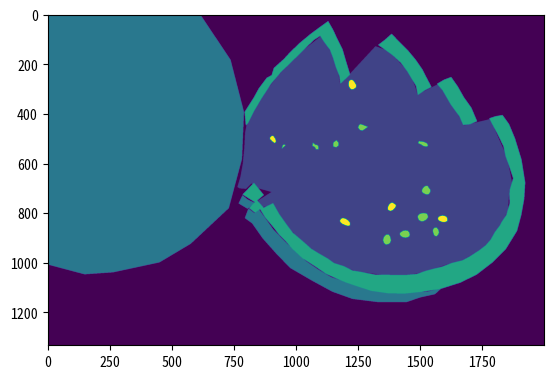

In [63]:
plt.imshow(label_mask)
plt.show()

## 对比测试集标注和语义分割预测结果

In [64]:
# 测试集标注
label_mask.shape

(1333, 2000)

In [65]:
# 语义分割预测结果
pred_mask.shape

(1333, 2000)

In [66]:
# 真实为前景，预测为前景
TP = (label_mask == 1) & (pred_mask==1)

In [67]:
# 真实为背景，预测为背景
TN = (label_mask == 0) & (pred_mask==0)

In [68]:
# 真实为前景，预测为背景
FN = (label_mask == 1) & (pred_mask==0)

In [69]:
# 真实为背景，预测为前景
FP = (label_mask == 0) & (pred_mask==1)

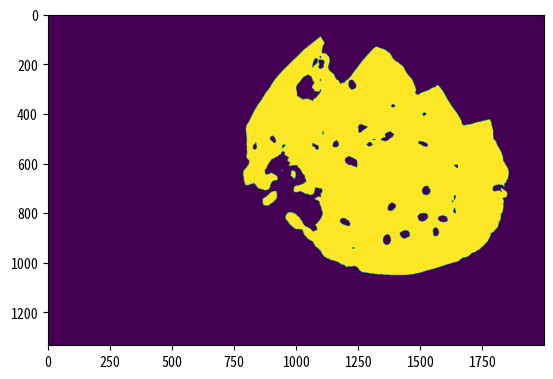

In [70]:
plt.imshow(TP)
plt.show()

In [71]:
confusion_map = TP * 255 + FP * 150 + FN * 80 + TN * 30

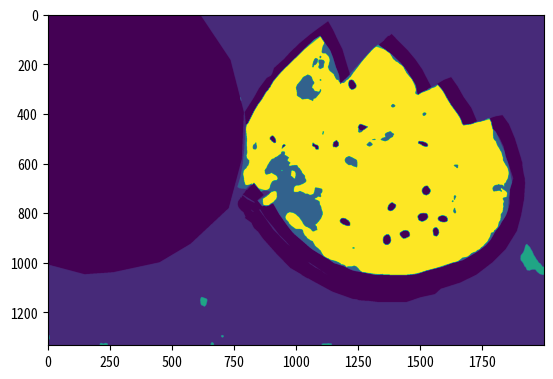

In [72]:
plt.imshow(confusion_map)
plt.show()

## 混淆矩阵

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
confusion_matrix_model = confusion_matrix(label_mask.flatten(), pred_mask.flatten())

In [75]:
confusion_matrix_model

array([[1008506,    8383,    1589,     402,       0,       0],
       [  68785,  635678,       0,     430,     167,       0],
       [ 712123,     237,   57908,     503,       0,       0],
       [  37845,    7307,     654,  115004,       0,       0],
       [    514,    2958,       0,       0,    3160,       0],
       [    187,    3660,       0,       0,       0,       0]])

In [76]:
import itertools
def cnf_matrix_plotter(cm, classes, cmap=plt.cm.Blues):
    """
    传入混淆矩阵和标签名称列表，绘制混淆矩阵
    """
    plt.figure(figsize=(10, 10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # plt.colorbar() # 色条
    tick_marks = np.arange(len(classes))

    plt.title('Confusion Matrix', fontsize=30)
    plt.xlabel('Pred', fontsize=25, c='r')
    plt.ylabel('True', fontsize=25, c='r')
    plt.tick_params(labelsize=16) # 设置类别文字大小
    plt.xticks(tick_marks, classes, rotation=90) # 横轴文字旋转
    plt.yticks(tick_marks, classes)

    # 写数字
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 fontsize=12)

    plt.tight_layout()

    plt.savefig('混淆矩阵.pdf', dpi=300) # 保存图像
    plt.show()

In [77]:
classes = ['/', 'red', 'green', 'white', 'seed-black', 'seed-white']

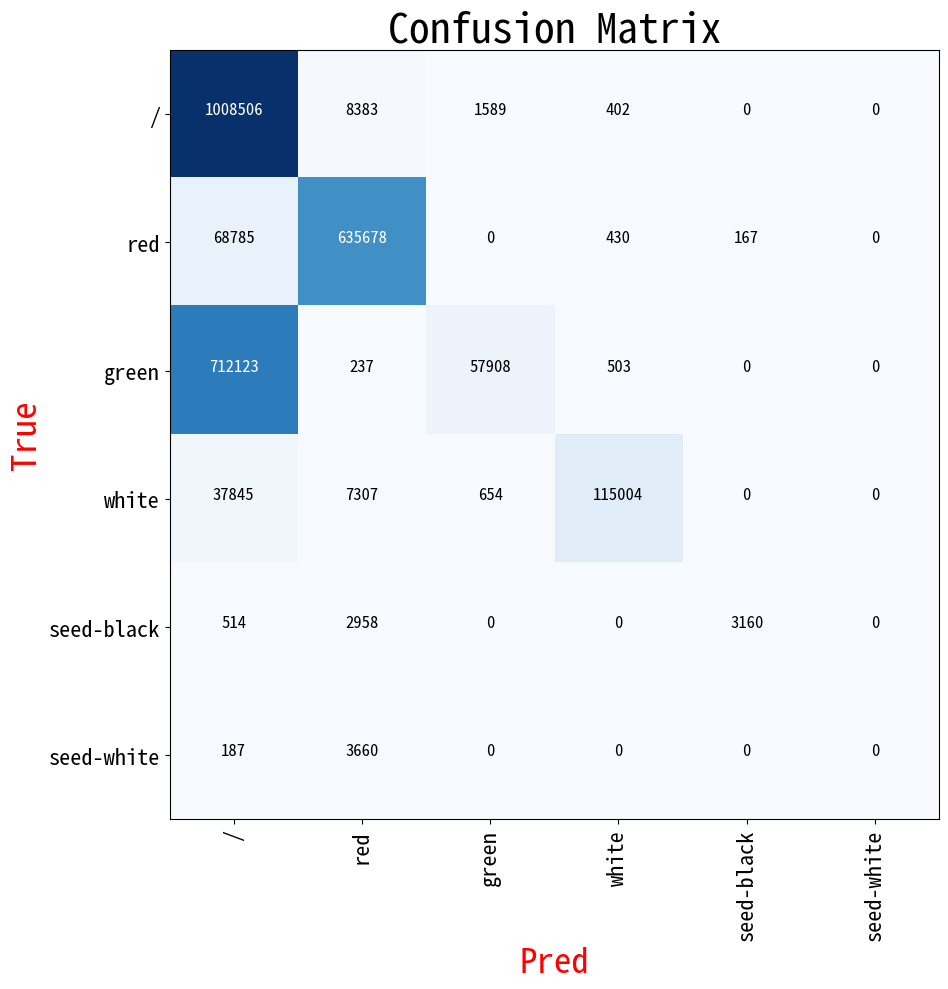

In [78]:
cnf_matrix_plotter(confusion_matrix_model, classes, cmap='Blues')

Unlabeled类别，既无预测结果，也无标签，因此混淆矩阵中不显示。